Code by: Andrea Jara & Sebastian Garzón (Los Andes University)

In [2]:
%pylab inline
import math
import numpy as np
import scipy.special as sp

Populating the interactive namespace from numpy and matplotlib


In [3]:
k=10**-6 #m^2/s
def ridgeT(x,y,v): #v en cm/yr, y, x en m
    T=sp.erfc(y/(2*sqrt(abs(x)*k/(v/(100*365*24*3600)))))*1300+273 #K
    return T

# Temperature as a function of distance(x) to the ridge and depth(z) from the surface 

In [4]:
x=linspace(-150000,150000,5000)
y=linspace(0,-80000,5000)
X,Y=np.meshgrid(x,y)

# Simulation 1. Ridge velocity of 0.5 cm/year (slow)

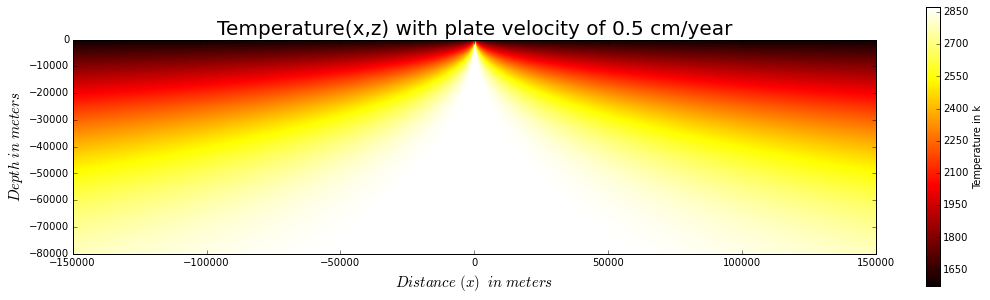

In [5]:
Z=ridgeT(X,Y,0.5)
plt.subplots(figsize=(18, 5))
imshow(Z,extent=[x.min(), x.max(), y.min(), y.max()],cmap=cm.hot)
plt.title('Temperature(x,z) with plate velocity of 0.5 cm/year',fontsize=20)
plt.xlabel('$Distance\ (x)\  \ in\ meters$', fontsize=15)
plt.ylabel('$Depth\ in\ meters$', fontsize=15)
cb=plt.colorbar()
cb.set_label('Temperature in k')

# Simulation 2. Ridge velocity of 4 cm/year (medium)

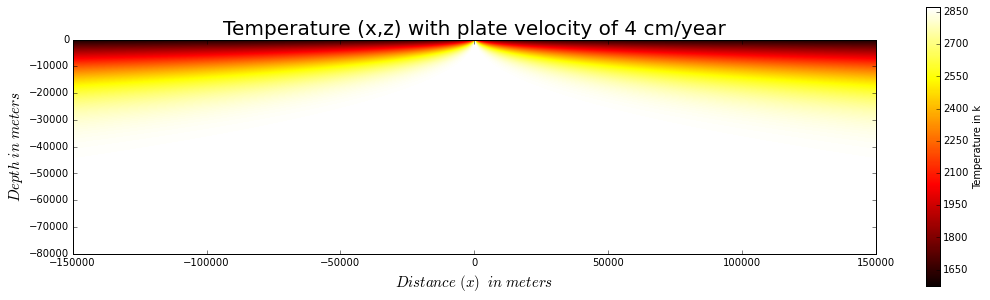

In [6]:
Z1=ridgeT(X,Y,4)
plt.subplots(figsize=(18, 5))
imshow(Z1,extent=[x.min(), x.max(), y.min(), y.max()],cmap=cm.hot)
plt.title('Temperature (x,z) with plate velocity of 4 cm/year',fontsize=20)
plt.xlabel('$Distance\ (x)\  \ in\ meters$', fontsize=15)
plt.ylabel('$Depth\ in\ meters$', fontsize=15)
cb=plt.colorbar()
cb.set_label('Temperature in k')

# Simulation 3. Ridge velocity of 10 cm/year (fast)

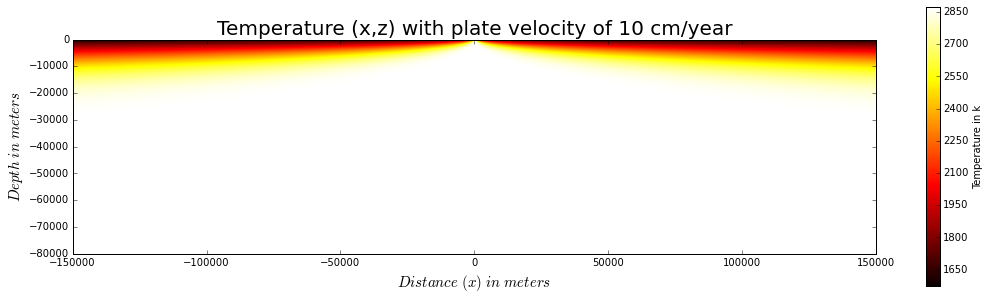

In [7]:
Z2=ridgeT(X,Y,10)
plt.subplots(figsize=(18, 5))
plt.title('Temperature (x,z) with plate velocity of 10 cm/year',fontsize=20)
plt.xlabel('$Distance\ (x)\ in\ meters$', fontsize=15)
plt.ylabel('$Depth\ in\ meters$', fontsize=15)
imshow(Z2,extent=[x.min(), x.max(), y.min(), y.max()],cmap=cm.hot)
cb=plt.colorbar()
cb.set_label('Temperature in k')

# Thickness of the thermal lithosphere as a function of x.

In [8]:
def yBL(x,v): #x en m, v en cm/yr
    y=-2.32*sqrt(k*abs(x)/(v/(100*365*24*3600)))
    return y

(-80000, 0)

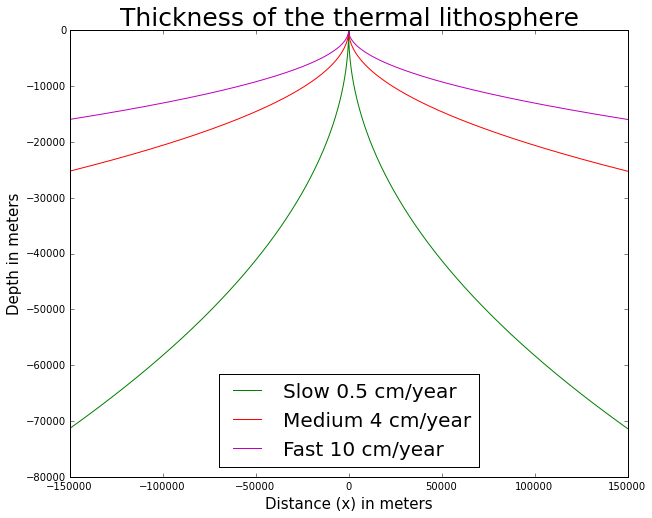

In [9]:
x5=linspace(-150000,150000,10000)
figure(figsize=(10,8))
plot(x5,yBL(x5,0.5),c='g',label=r'Slow 0.5 cm/year')
plot(x5,yBL(x5,4),c='r',label=r'Medium 4 cm/year')
plot(x5,yBL(x5,10),c='m',label=r'Fast 10 cm/year')
title("Thickness of the thermal lithosphere",fontsize=25)
xlabel('Distance (x) in meters', fontsize=15)
ylabel('Depth in meters', fontsize=15)
legend(fontsize=20, loc='lower center')
ylim(-80000,0)


# Ocean bathymetry

In [10]:
rhom=3300 #kg/m^3
rhow=1000 #kg/m^3
alpha=1.6*10**-5 #/°C
deltaT=1200
def water(x,v): #x en m, v en cm/yr
    w=(-rhom/(rhom-rhow))*alpha*deltaT*2*sqrt(k*abs(x)/(v/(100*365*24*3600)))/sqrt(pi)
    return w

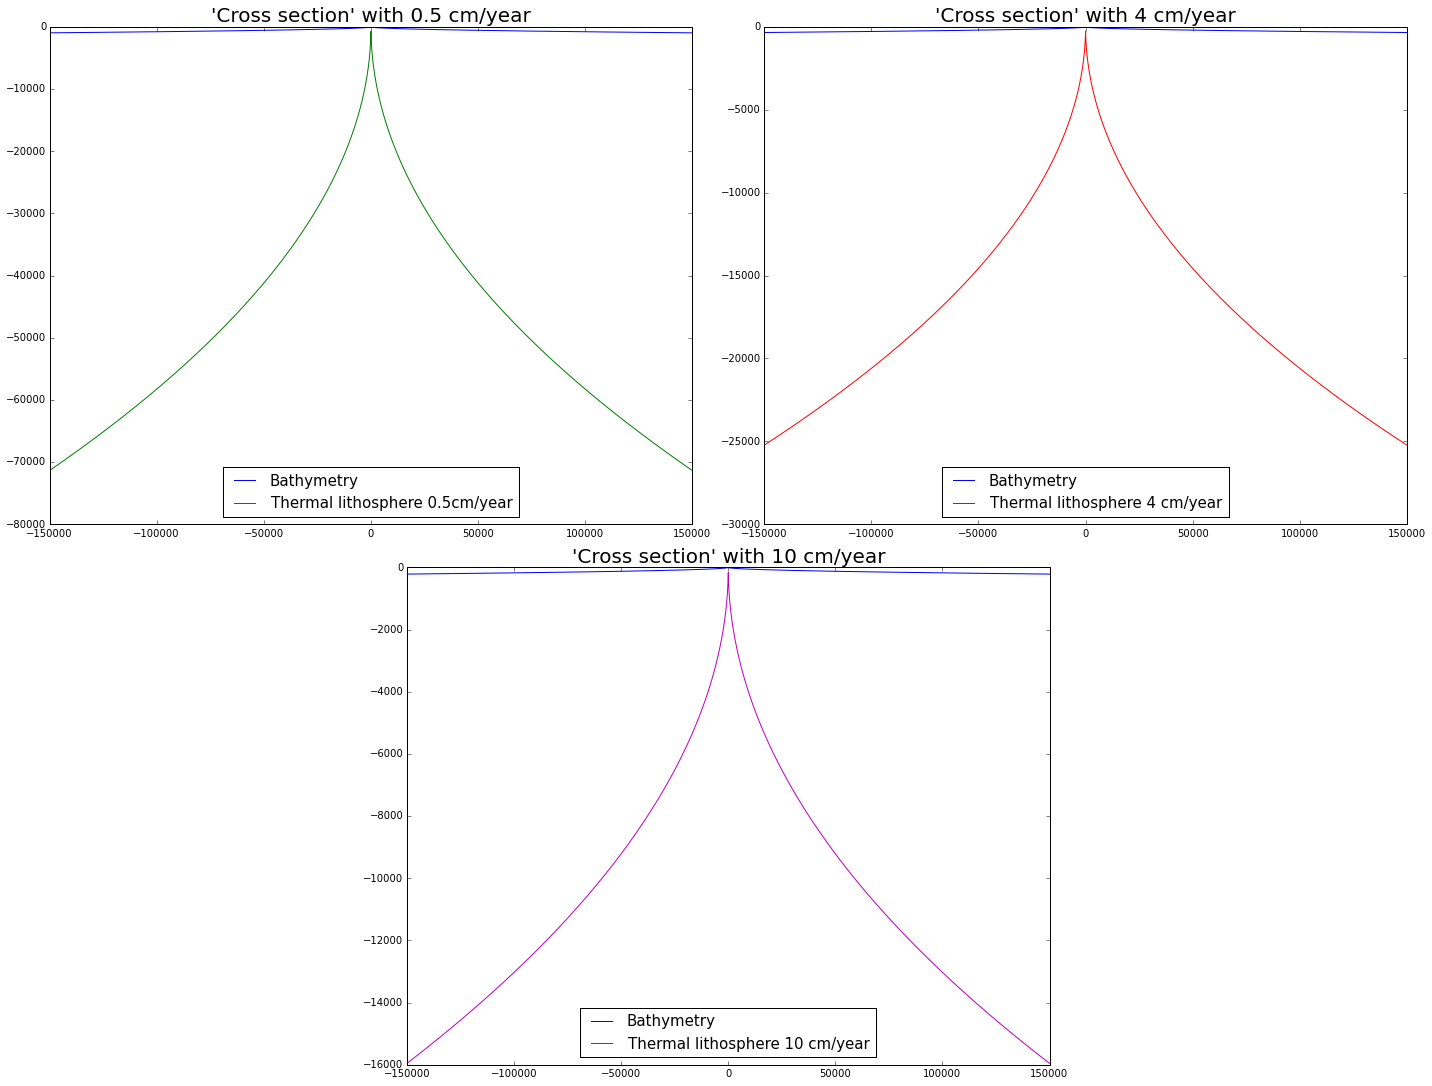

In [11]:
import matplotlib.gridspec as gridspec
figure(figsize=(20,30))
gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[0,0:2])
plot(x5,water(x5,0.5),label="Bathymetry")
plot(x5,yBL(x5,0.5), label="Thermal lithosphere 0.5cm/year")
title("'Cross section' with 0.5 cm/year",fontsize=20)
legend(fontsize=15, loc='lower center')
ax2 = plt.subplot(gs[0,2:])
plot(x5,water(x5,4),label="Bathymetry")
plot(x5,yBL(x5,4),c='r',label="Thermal lithosphere 4 cm/year")
title("'Cross section' with 4 cm/year",fontsize=20)
legend(fontsize=15, loc='lower center')
ax3 = plt.subplot(gs[1,1:3])
plot(x5,water(x5,10),label="Bathymetry")
plot(x5,yBL(x5,10),c='m',label="Thermal lithosphere 10 cm/year")
title("'Cross section' with 10 cm/year",fontsize=20)
legend(fontsize=15, loc='lower center')
fig = gcf()
gs.tight_layout(fig)


# Relaxation time

/opt/conda/lib/python3.4/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.4/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in power


(0, 1500)

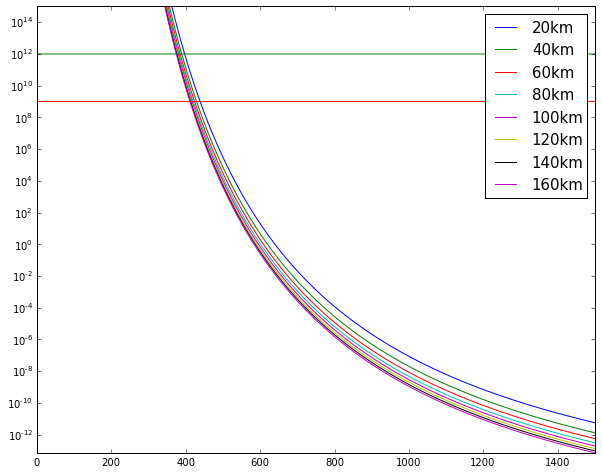

In [12]:
n=3.1
Q=240*10**3
A=8*10**(-3)
R=8.3
E=50*10**-3
temperatura=linspace(0,1500,2000)
limDown=linspace(1,1,2000)*10**9
limUp=linspace(1,1,2000)*10**12

def relax(stress,t):
    relax=((stress**(1-n))*(e**(Q/(R*t))))/(2*A*E)
    return relax
figure(figsize(10,8))
plt.semilogy(temperatura,relax(20*(3.3*10**9),temperatura),label="20km")
plt.semilogy(temperatura,relax(40*(3.3*10**9),temperatura),label="40km")
plt.semilogy(temperatura,relax(60*(3.3*10**9),temperatura),label="60km")
plt.semilogy(temperatura,relax(80*(3.3*10**9),temperatura),label="80km")
plt.semilogy(temperatura,relax(100*(3.3*10**9),temperatura),label="100km")
plt.semilogy(temperatura,relax(120*(3.3*10**9),temperatura),label="120km")
plt.semilogy(temperatura,relax(140*(3.3*10**9),temperatura),label="140km")
plt.semilogy(temperatura,relax(160*(3.3*10**9),temperatura),label="160km",c="m")
plt.semilogy(temperatura,limUp)
plt.semilogy(temperatura,limDown)
legend(fontsize=15)

plt.ylim(0,10**15)
plt.xlim(0,1500)

# Viscoelastic lithosphere

Populating the interactive namespace from numpy and matplotlib


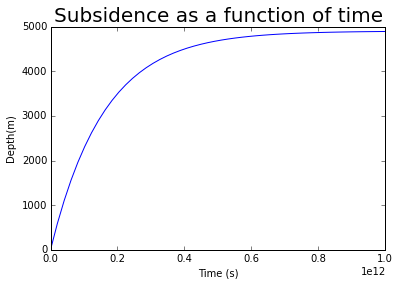

In [18]:
%pylab inline
x=linspace(0,1*10**12)
y=linspace(1,1)*20
def funcion(x):
    p=-4900*exp(-x/(1.6*10**11))+4900
    return p
plot(x,funcion(x))
title("Subsidence as a function of time",fontsize=20)
xlabel("Time (s)")
ylabel("Depth(m)")